## **HW2_COBOTS**

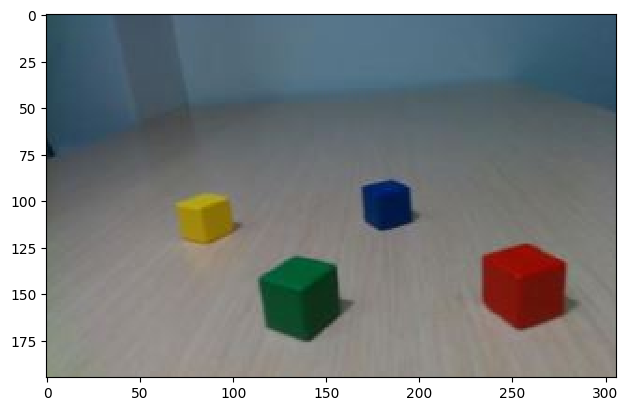

In [ ]:
from skimage import io
img = io.imread('/content/Capture.JPG')
io.imshow(img)

## **P2**

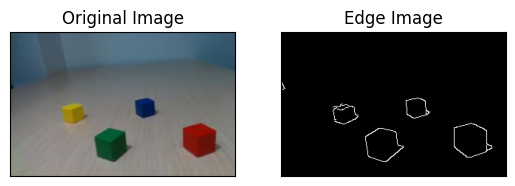

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('/content/Capture.JPG', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-108-086fdb873b44>:9: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


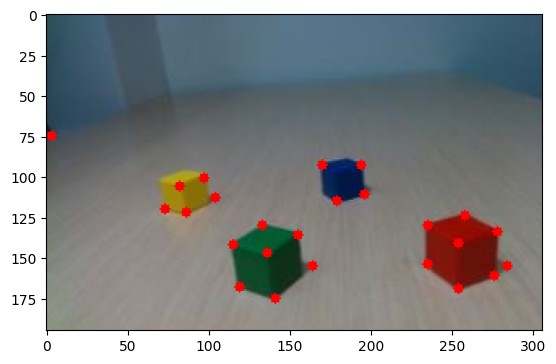

(<matplotlib.image.AxesImage at 0x7f6e5f55c970>, None)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#img = cv.imread('/content/Capture.JPG')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
 x,y = i.ravel()
 cv.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

## **P1**

# Blue

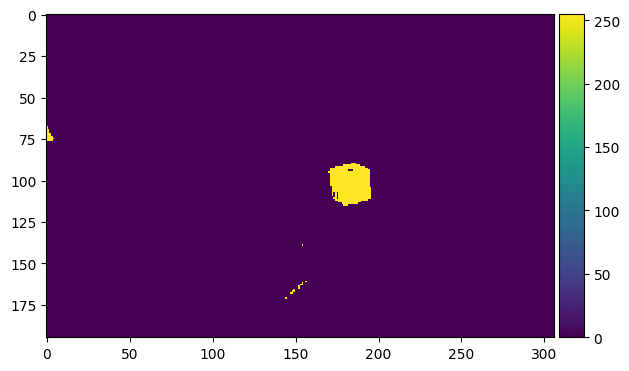

In [ ]:
import cv2
import numpy as np

# Read image
#img = cv2.imread('/content/Capture.JPG')

# threshold red
lower = np.array([0, 0, 0])
upper = np.array([40, 40, 255])
thresh = cv2.inRange(img, lower, upper)

# Change non-red to white
result = img.copy()
result[thresh != 255] = (255,255,255)

# save results
cv2.imwrite('red_numerals_thresh.jpg', thresh)
cv2.imwrite('red_numerals_result.jpg', result)

#cv2.imshow('thresh', thresh)
io.imshow(thresh)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# **Yellow**

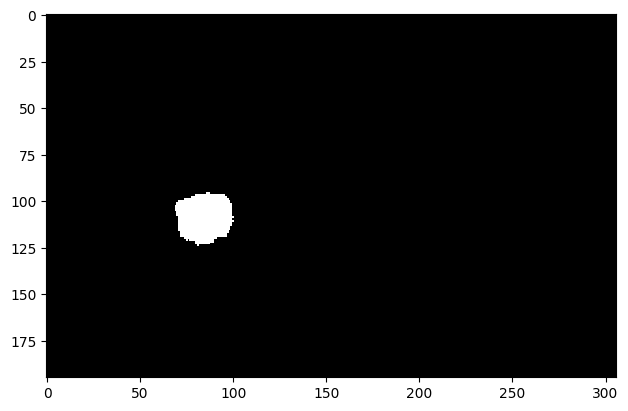

In [ ]:
import numpy as np
import cv2

image = cv2.imread('/content/Capture.JPG')
original = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([22, 93, 0], dtype="uint8")
upper = np.array([45, 255, 255], dtype="uint8")
mask = cv2.inRange(image, lower, upper)

cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (36,255,12), 2)

io.imshow( mask)


# **Red**

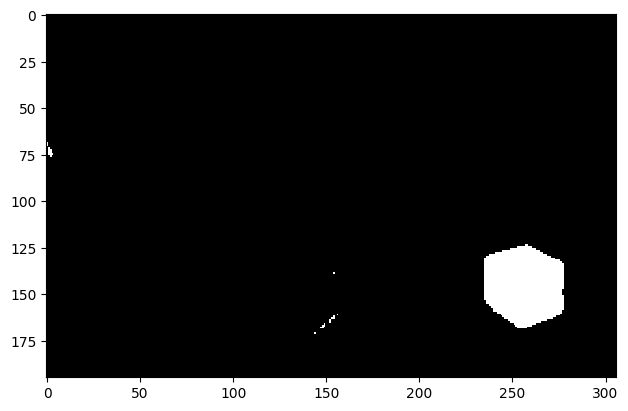

In [ ]:
import cv2
import numpy as np

# Read image
#img = cv2.imread('/content/Capture.JPG')

# threshold red
lower = np.array([, 0, 0])
upper = np.array([255, 40, 40])
thresh = cv2.inRange(img, lower, upper)

# Change non-red to white
result = img.copy()
result[thresh != 255] = (255,255,255)

# save results
cv2.imwrite('red_numerals_thresh.jpg', thresh)
cv2.imwrite('red_numerals_result.jpg', result)

#cv2.imshow('thresh', thresh)
io.imshow(thresh)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# **green**

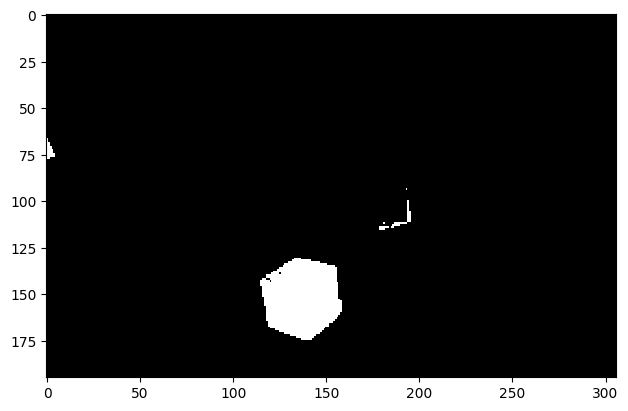

In [ ]:
import cv2
import numpy as np

# Read image
#img = cv2.imread('/content/Capture.JPG')

# threshold red
lower = np.array([0, 0, 0])
upper = np.array([60, 255, 60])
thresh = cv2.inRange(img, lower, upper)

# Change non-red to white
result = img.copy()
result[thresh != 255] = (255,255,255)

# save results
cv2.imwrite('red_numerals_thresh.jpg', thresh)
cv2.imwrite('red_numerals_result.jpg', result)

#cv2.imshow('thresh', thresh)
io.imshow(thresh)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# **P3**

In [ ]:
!pip install apriltag

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for apriltag: filename=apriltag-0.0.16-cp310-cp310-linux_x86_64.whl size=506899 sha256=db12c69128427098b735caf980dbea87d6ebe5a763623867d682b71654eb7a74
  Stored in directory: /root/.cache/pip/wheels/06/b0/0f/31eead0216b5f1df61d62733b48d7c2247912bfe64808f8ea5
Successfully built apriltag


In [ ]:
 import cv2
 import apriltag

In [ ]:
import apriltag
import argparse
import cv2
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image containing AprilTag")
args = vars(ap.parse_args())

usage: colab_kernel_launcher.py [-h] -i IMAGE
colab_kernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
image = cv2.imread('/content/22.JPG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
print("[INFO] detecting AprilTags...")
options = apriltag.DetectorOptions(families="tag36h11")
detector = apriltag.Detector(options)
results = detector.detect(gray)
print("[INFO] {} total AprilTags detected".format(len(results)))

[INFO] detecting AprilTags...
[INFO] 1 total AprilTags detected


In [ ]:
from google.colab.patches import cv2_imshow

[INFO] tag family: tag36h11


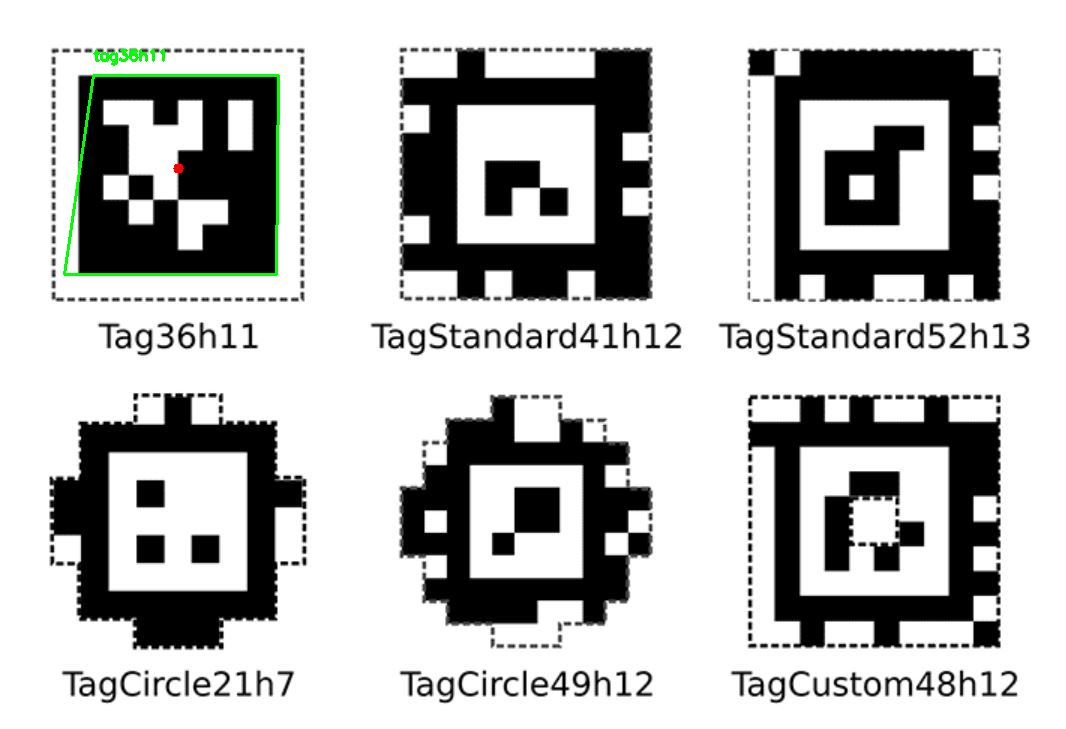

In [ ]:
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))
	# draw the bounding box of the AprilTag detection
	cv2.line(image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(image, ptD, ptA, (0, 255, 0), 2)
	# draw the center (x, y)-coordinates of the AprilTag
	(cX, cY) = (int(r.center[0]), int(r.center[1]))
	cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)
	# draw the tag family on the image
	tagFamily = r.tag_family.decode("utf-8")
	cv2.putText(image, tagFamily, (ptA[0], ptA[1] - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	print("[INFO] tag family: {}".format(tagFamily))
# show the output image after AprilTag detection
cv2_imshow( image)

In [ ]:
image = cv2.imread('/content/apriltag.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
print("[INFO] detecting AprilTags...")
options = apriltag.DetectorOptions(families="tag36h11")
detector = apriltag.Detector(options)
results = detector.detect(gray)
print("[INFO] {} total AprilTags detected".format(len(results)))

[INFO] detecting AprilTags...
[INFO] 35 total AprilTags detected


[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11


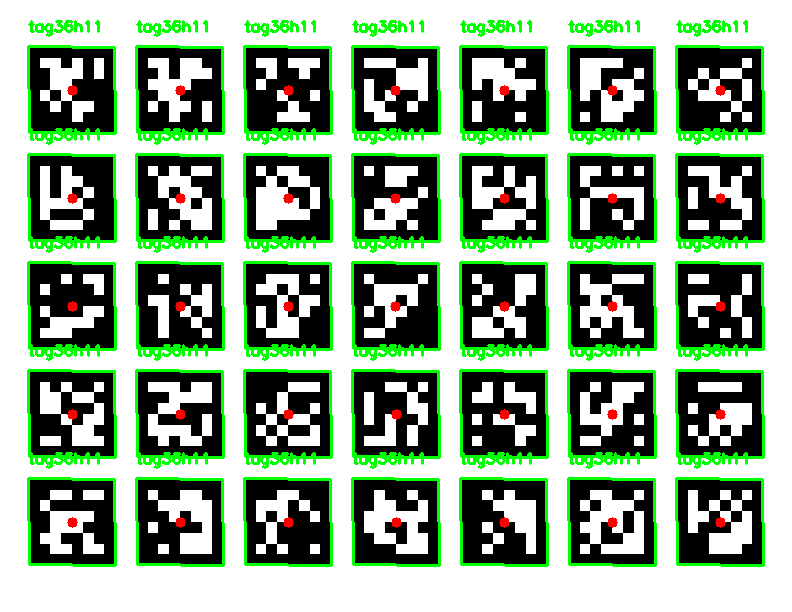

In [ ]:
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))
	# draw the bounding box of the AprilTag detection
	cv2.line(image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(image, ptD, ptA, (0, 255, 0), 2)
	# draw the center (x, y)-coordinates of the AprilTag
	(cX, cY) = (int(r.center[0]), int(r.center[1]))
	cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)
	# draw the tag family on the image
	tagFamily = r.tag_family.decode("utf-8")
	cv2.putText(image, tagFamily, (ptA[0], ptA[1] - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	print("[INFO] tag family: {}".format(tagFamily))
# show the output image after AprilTag detection
cv2_imshow( image)